<a href="https://colab.research.google.com/github/nohjuhyeon/study_AIs/blob/main/docs/quests/NLPs/wordcloud_regexp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 한글처리

In [1]:
!apt-get -y install fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
!ls /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf

/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf


In [3]:
from collections import Counter
# Counter(text_split)

## read excel file with sheets

In [4]:
import pandas as pd
df_OWG = pd.read_excel('OneWord_Game.xlsx', sheet_name = None)
df_OWG

{'2월':                                                         Unnamed: 1  \
 0           문석천                                                NaN   
 1           김유진                                                NaN   
 2           노주현                                                NaN   
 3           김하늘                                                NaN   
 4           박요한                                                NaN   
 5           오지수                                 regular expression   
 6           김명준  자연어 처리\n컴퓨터가 인간의 언어를 이해하고 처리하는 기술을 말한다.\n컴퓨터를 ...   
 7           공명윤                                                NaN   
 8           한동철                                                NaN   
 9           조유경                                                NaN   
 10          김덕재                                                NaN   
 11          김경하                                                NaN   
 12          서정민                                                NaN   


In [5]:
df_OWG

{'2월':                                                         Unnamed: 1  \
 0           문석천                                                NaN   
 1           김유진                                                NaN   
 2           노주현                                                NaN   
 3           김하늘                                                NaN   
 4           박요한                                                NaN   
 5           오지수                                 regular expression   
 6           김명준  자연어 처리\n컴퓨터가 인간의 언어를 이해하고 처리하는 기술을 말한다.\n컴퓨터를 ...   
 7           공명윤                                                NaN   
 8           한동철                                                NaN   
 9           조유경                                                NaN   
 10          김덕재                                                NaN   
 11          김경하                                                NaN   
 12          서정민                                                NaN   


In [6]:
df_sheets = []
for sheet_name, df in df_OWG.items():
  df_sheets.append(df)
  print(f'{sheet_name} {type(df)}')
  pass
df_sheets[0]

2월 <class 'pandas.core.frame.DataFrame'>
1월 <class 'pandas.core.frame.DataFrame'>
12월 <class 'pandas.core.frame.DataFrame'>


,,Unnamed: 1,2024-02-15 00:00:00,2024-02-14 00:00:00,2024-02-13 00:00:00,2024-02-07 00:00:00,2024-02-06 00:00:00,2024-02-05 00:00:00,2024-02-02 00:00:00,2024-02-01 00:00:00
0,문석천,NaN,비지도학습\n머신러닝 학습의 일종으로 정답이 존재하지 않을 때 사용하는 방식이다.\...,랜덤포레스트\n지도 학습 알고리즘으로 의사결정트리의 집합이다.\n목적은 True나 ...,지도학습 (supervisor learning)\n머신러닝의 일종으로 컴퓨터에 모델...,귀무가설\nEDA를 통해 얻은 인사이트를 기반으로 CDA를 통해서 규명하고자 하는 ...,pearsonr\n다변수 검증 시 변수가 연속형과 연속형이고 정규분포일 경우 사용하...,insight\n인사이트를 통해 얻은 데이터를 기반으로 분석하여 얻는 과정으로 데이...,EDA(탐색 데이터 분석)\n얻은 데이터를 토대로 데이터탐색을 통한 가설을 수립하는...,boolean indexing\n데이터 프레임 내에서 컬럼에 특정 condition...
1,김유진,NaN,특성공학(feature engineering)\n원시 데이터로부터 유용한 특성을 추...,선형회귀(linear Regression)\n종속 변수 y와 한 개 이상의 독립변수...,"scikit-learn(사이킷런), sklearn\n파이썬을 기반으로 작동하는 오픈...",NaN,CDA 확증 데이터 분석(Confirmatory Data Analysis)\n규명하...,cut()\n데이터를 구간 길이에 따라 나누는 함수로 데이터를 구간별로 쪼개어 나누...,결측치(missing value)\n수집된 dataset 중 관측되지 않은 특정 확...,datetime\n날짜와 시간을 처리하는 다양한 기능을 제공하는 파이썬 라이브러리로...
2,노주현,NaN,scaling\n수치형 데이터 변수들의 범위를 조정하는 과정입니다.\n데이터를 일정...,선형 회귀\n종속 변수와 독립 변수들 간의 관계를 파악하는데 사용하는 통계적인 방법...,군집화(Clustering)\n유사한 특성을 가진 데이터들끼리 그룹으로 나누는 작업...,anderson test \n5000개 넘는 record를 가진 연속형 데이터의 정...,"확증 데이터 분석\n규명하고자 하는 바를 가설로 수립하여, 해당 가설이 참인지 거짓...",concat \n여러 개의 데이터프레임이나 시리즈를 하나의 구조로 연결할 때 사용하...,"데이터 전처리\n분석을 하기 전에 데이터를 정리하고, 결측치와 이상값을 처리하는 과...",boxplot\n수치형 데이터의 분포와 이상값을 시각화하는 그래프입니다. \n4분위...
3,김하늘,NaN,NaN,피클 모듈\n파이썬 객체를 저장하는데 사용하는 모듈로 작업 중인 파이썬 객체를 저장...,지도 학습\n문제와 정답을 모두 알려주고 공부시키는 머신러닝의 일종으로 예측과 분류...,"확증 데이터 분석(CDA)\n규명하고자 하는 바를 가설로 수립한 다음, 해당 가설의...",Anderson-normality Test\n연속형 데이터의 정규분포 여부를 확인하...,귀무가설\n기각을 목적으로 수립하는 가설로 p-value가 0.05 이상일 때 귀무...,NaN,jointplot\n산점도와 히스토그램을 결합한 그래프로 데이터의 분포와 변수 간의...
4,박요한,NaN,넓이 우선 탐색\nBFS Breadth-First Search\n\n루트 노드에서 ...,서브쿼리\n\n쿼리 내부에 중첩된 쿼리문으로 쿼리 내에서 다차적 분류를 시행하여 연...,Logistic Regression\n\n범주형 종속 변수의 결과를 예측하기 위해 ...,이분탐색\n\n리스트 탐색 알고리즘 중 하나로 중앙값을 준으로 low high를 나...,"정규표현식\n\n프로그래밍 내에서 사용하는 형식 언어로써, 특정한 패턴을 가진 문자...",Generator\n\n순서가 있는 iterator를 생성해주는 기능으로 yield...,탐욕 알고리즘\n\n양자 컴퓨터의 병렬적 구조가 아닌 현재의 직렬적 컴퓨터 시스템 ...,NaN
5,오지수,regular expression,Encoding\n범주형 데이터를 숫자형 데이터로 변환하는 과정을 말한다. 이 과정...,"강화학습(reinforcement learning)\n문제와 정답을 알려주지 않고,...",데이터 전처리\n결측치나 이상치를 분석에 적합한 형태로 가공하고 정제하는 과정을 말...,PDA(Predictive Data Analysis)\n데이터 간 관계를 학습한 것...,기대빈도수(expected frequencies)\n어떤 사건이 일어날 것으로 예상...,상관계수(correlation coefficient)\n두 연속형 변수간의 상관관계...,NaN,산점도(scatter plot)\n2개의 연속형 변수를 이용해 점을 찍어 만든 통계...
6,김명준,자연어 처리\n컴퓨터가 인간의 언어를 이해하고 처리하는 기술을 말한다.\n컴퓨터를 ...,지도학습\n컴퓨터에게 문제와 정답을 모두 알려주고 공부시키는 머신러닝의 일종이다.\...,머신러닝\n인간의 학습 능력과 같은 기능을 컴퓨터에서 실현하고자 하는 기술 및 기법...,귀무가설\n차이가 없거나 의미있는 차이가 없는 경우의 가설이다.\n실험이나 연구를 ...,대립가설\n새로운 결과나 주장을 '참'이라는 걸 입증하기위한 가설이다.\n확률적으로...,p-value\n확률을 측정한것이다. 0.05 이하면 통계적으로 유의하다고 판단한다...,seaborn\n그래프를 매우 쉽게 표현할 수 있도록 돕는 시각화 라이브러리이다.\...,pandas boxplot\n데이터의 통계적의미를 표현하기위해 주로 사용한다.\n데...,Series\n1열로만 이루어진 자료구조이다.(index + value)\n각 셀에...
7,공명윤,NaN,NaN,NaN,NaN,PDA(Predictive Data Analysis)\n데이터 간 관계를 수치화해서...,확증 데이터 분석(Confirmatory Data Analysis)\n규명하고자 하...,탐색 데이터 분석(Exploratory Data Analysis)\n- 데이터 증상...,DDA(묘사 데이터 분석\n통계적인 수치 데이터나 데이터의 구조 등을 분석하는 방법...,NaN
8,한동철,NaN,"데이터스케일링\n머신러닝을 위한 데이터셋을 정제할때, 특성별로 데이터\n스케일이 다...",딥러닝\n컴퓨터가 인간처럼 판단하고 학습할 수 있도록 하고 \n이를 통해 사물이나 ...,"머신러닝\n머신 러닝 또는 기계 학습은 컴퓨터 과학 중 인공지능의\n 한 분야로, ...",pda\n데이터에 내재된 패턴을 분석하여 아직 수행되지\n않을 일의 결과를 예측하...,상관계수\n2개의 연속형 변수 간의 연관성에 대한 \n측도이고 변수간의 분산상황이...,Kaggle\n전 세계 데이터 사이언티스트들이 데이터를 분석할 수\n 있도록 대회를...,Seaborn\n시본은 Mapplotib 를 기반으로 발전된 라이브러리로써 \n원하...,"PANDAS loc\n판다스에서 데이터프레임을 특정 행 , 열 을 기준으로 \n나누..."
9,조유경,NaN,NaN,Supervised Learning 지도 학습\n머신러닝을 학습시키는 방식 중 하나...,Linear Regression 선형회귀분석\n데이터의 경향성을 가장 잘 설명하는 ...,p-value\n관찰된 데이터 이상의 극단적인 결과를 얻을 확률을 의미한다. \np...,대립가설\n귀무가설에 대조되는 가설로 특정한 관계나 차이가 존재하다는 것을 주장하는...,cut()\n데이터를 구간 길이에 따라 나누는 함수이다. \n연속형 데이터를 범주형...,"EDA(탐색 데이터 분석, Exploratory Data Analysis)\n데이터...",query\ndataframe에서 data를 특정조건에 따라 필터링할때 사용되는 메...


In [7]:
for i in range(len(df_sheets)):
  df_sheets[i].fillna("", inplace=True)
df_sheets[0].isnull().sum()

                       0
Unnamed: 1             0
2024-02-15 00:00:00    0
2024-02-14 00:00:00    0
2024-02-13 00:00:00    0
2024-02-07 00:00:00    0
2024-02-06 00:00:00    0
2024-02-05 00:00:00    0
2024-02-02 00:00:00    0
2024-02-01 00:00:00    0
dtype: int64

In [8]:
user_OWG_list = []
for i in range(len(df_sheets)):
  for j in range(len(df_sheets[i])):
    user_text = ' '.join(df_sheets[i].iloc[j,1:].to_list())
    user_OWG_list.append(user_text)
entire_OWG_text = ' '.join(user_OWG_list)
entire_OWG_text
# user_OWG_list = []
# for i in range(len(df_sheets)):
#   for j in range(len(df_sheets[i])):
#     sheets_list = df_sheets[i].iloc[j,1:].to_list()
#     # print(sheets_list)
#     user_OWG_list.append(user_text)
# entire_OWG_text = ' '.join(user_OWG_list)
# entire_OWG_text

' 비지도학습\n머신러닝 학습의 일종으로 정답이 존재하지 않을 때 사용하는 방식이다.\n목적: 정답이 없기때문에 주어진 학습방식을 이용하여 데이터가 가진 의미를 도출해내기 위해 사용한다 랜덤포레스트\n지도 학습 알고리즘으로 의사결정트리의 집합이다.\n목적은 True나 False로 응답하는 의사결정트리를 집합함으로써 학습의 성능을 높이기 위해서다. 지도학습 (supervisor learning)\n머신러닝의 일종으로 컴퓨터에 모델에 문제와 답을 부여하여 학습시키는 방식이다.\n목적 : feature값과 같은 입력 데이터에 따른 target값을 예측하는 모델을 생성하기 위해 사용하기 위해 사용한다. 귀무가설\nEDA를 통해 얻은 인사이트를 기반으로 CDA를 통해서 규명하고자 하는 가설에 반대되어 기각하고자하는 가설이다.\n목적은 이것을 기각하여 밝히고자 하는 가설의 진실 여부를 판별하기 위해 사용한다 pearsonr\n다변수 검증 시 변수가 연속형과 연속형이고 정규분포일 경우 사용하는 CDA 기술 중 하나로 EDA를 통해 수립한 가설이 유의한지의 여부를 판별하기 위해 사용한다. insight\n인사이트를 통해 얻은 데이터를 기반으로 분석하여 얻는 과정으로 데이터를 예측하거나 데이터가 가진 의미를 확인하는 기술이다. EDA(탐색 데이터 분석)\n얻은 데이터를 토대로 데이터탐색을 통한 가설을 수립하는 단계로 x축의 feature과 y축의 target의 상관관계를 분석하여 인사이트를 도출하는 기술이다.\n목적으로는 위 분석을 시각화하여 상대를 설득시키기 위해 진행한다. boolean indexing\n데이터 프레임 내에서 컬럼에 특정 condition을 부여한 후 결과가 True값에 해당하는 row값들을 추출하는 방법이다.\n목적은 자신이 얻고자 하는 기준에 해당하는 데이터값을 얻고자 할 때 사용한다.  특성공학(feature engineering)\n원시 데이터로부터 유용한 특성을 추출하거나 생성하는 과정으로, 데이터의 수치적인 질을 향상시켜 머신러닝 모델의 예측 성

In [137]:
# 조사 제거
import re
patterns = '(입니다 |있도록 |위한 |통해|다른 |하는|않을|되는|되어|하기|이다|하지 |하여 |으로 |위해 |있다|한다|있는| 수 | 것 |할 |는 |데 |은 |을 |를 |와 |가 |의 |로 |에 |이 |때 |등 |\n | W.|W,|\\n|W:|\(|\)|\.|\,)'
text_regex = re.sub(pattern = patterns, repl = " ",string=entire_OWG_text)
text_regex

' 비지도학습 머신러닝 학습 일종 정답 존재    사용  방식   목적: 정답 없기때문 주어진 학습방식 이용 데이터 가진 의미 도출해내기  사용  랜덤포레스트 지도 학습 알고리즘 의사결정트리 집합   목적 True나 False 응답  의사결정트리 집합함으로써 학습 성능 높이기 위해서다  지도학습  supervisor learning  머신러닝 일종 컴퓨터 모델 문제 답 부여 학습시키 방식   목적 : feature값과 같 입력 데이터 따른 target값 예측  모델 생성   사용   사용   귀무가설 EDA   얻 인사이트 기반 CDA  서 규명하고자   가설 반대  기각하고자  가설   목적 이것 기각 밝히고자   가설 진실 여부 판별   사용  pearsonr 다변수 검증 시 변수 연속형과 연속형이고 정규분포일 경우 사용  CDA 기술 중 하나 EDA   수립한 가설 유의한지 여부 판별   사용   insight 인사이트   얻 데이터 기반 분석 얻 과정 데이터 예측하거나 데이터 가진 의미 확인  기술   EDA 탐색 데이터 분석  얻 데이터 토대 데이터탐색 통한 가설 수립  단계 x축 feature과 y축 target 상관관계 분석 인사이트 도출  기술   목적으로 위 분석 시각화 상대 설득시키기  진행   boolean indexing 데이터 프레임 내에서 컬럼 특정 condition 부여한 후 결과 True값 해당  row값들 추출  방법   목적 자신 얻고자   기준 해당  데이터값 얻고자   사용    특성공학 feature engineering  원시 데이터로부터 유용한 특성 추출하거나 생성  과정으로  데이터 수치적인 질 향상시켜 머신러닝 모델 예측 성능 향상시키 것 목적   선형회귀 linear Regression  종속 변수 y 한 개 이상 독립변수 x와 선형 상관관계 모델링  회귀분석 기법으로  독립 변수들 종속 변수 값 예측  사용   scikit-learn 사이킷런   sklearn 파이썬 기반 작동  오픈 소스 소프트웨어 라이브러리 

In [138]:
text_split = text_regex.split()
series_text = pd.Series(text_split)

In [141]:
text_split_count = series_text.value_counts()[:30]
text_split_count

데이터       300
사용        238
수         111
분석         61
웹          53
값          50
처리         50
기능         43
것          42
코드         40
정보         40
변수         39
함수         38
특정         38
데이터베이스     34
목적         34
파이썬        31
방식         30
API        30
하나         30
서버         30
경우         29
확인         29
작업         27
명령어        27
가설         27
저장         26
쉽게         25
관리         25
표현         24
dtype: int64

## wordcloud

In [142]:
from wordcloud import WordCloud

In [143]:
wordCloud = WordCloud(background_color='white', font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(text_split_count)

In [144]:
wordCloud.words_

{'데이터': 1.0,
 '사용': 0.7933333333333333,
 '수': 0.37,
 '분석': 0.20333333333333334,
 '웹': 0.17666666666666667,
 '값': 0.16666666666666666,
 '처리': 0.16666666666666666,
 '기능': 0.14333333333333334,
 '것': 0.14,
 '코드': 0.13333333333333333,
 '정보': 0.13333333333333333,
 '변수': 0.13,
 '함수': 0.12666666666666668,
 '특정': 0.12666666666666668,
 '데이터베이스': 0.11333333333333333,
 '목적': 0.11333333333333333,
 '파이썬': 0.10333333333333333,
 '방식': 0.1,
 'API': 0.1,
 '하나': 0.1,
 '서버': 0.1,
 '경우': 0.09666666666666666,
 '확인': 0.09666666666666666,
 '작업': 0.09,
 '명령어': 0.09,
 '가설': 0.09,
 '저장': 0.08666666666666667,
 '쉽게': 0.08333333333333333,
 '관리': 0.08333333333333333,
 '표현': 0.08}

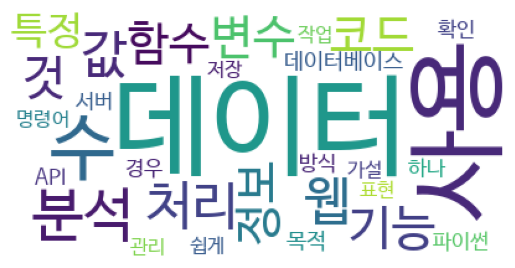

In [145]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off')
plt.show()